In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltb

%matplotlib inline

In [2]:
# File Path

dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
# 0 個小孩
# 有 1 - 2 個小孩
# 有 3 - 5 個小孩
# 有超過 5 個小孩

cut_rule = [0, 1, 3, 6, app_train['CNT_CHILDREN'].max() + 1]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
print("CNT_CHILDREN size:", app_train['CNT_CHILDREN'].size)
print("CNT_CHILDREN_GROUP size:", app_train['CNT_CHILDREN_GROUP'].size)
app_train['CNT_CHILDREN_GROUP'].value_counts()

CNT_CHILDREN size: 307511
CNT_CHILDREN_GROUP size: 307511


(-0.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 6.0]          534
(6.0, 20.0]          21
Name: CNT_CHILDREN_GROUP, dtype: int64

In [41]:
# 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

#2-1

grp = ['CNT_CHILDREN_GROUP', 'TARGET']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']

#grouped_df = app_train.loc[:, ['CNT_CHILDREN_GROUP', 'TARGET', 'AMT_INCOME_TOTAL']].groupby(['CNT_CHILDREN_GROUP', 'TARGET'])

print(grouped_df.mean())

print("\n", grouped_df.size())
grouped_df.value_counts()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         168554.452269
                    1         166133.317001
(1.0, 3.0]          0         173824.963059
                    1         161627.570234
(3.0, 6.0]          0         173158.841202
                    1         150114.705882
(6.0, 20.0]         0         134500.000000
                    1         255000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

 CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         254427
                    1          22063
(1.0, 3.0]          0          27775
                    1           2691
(3.0, 6.0]          0            466
                    1             68
(6.0, 20.0]         0             18
                    1              3
Name: AMT_INCOME_TOTAL, dtype: int64


CNT_CHILDREN_GROUP  TARGET  AMT_INCOME_TOTAL
(-0.001, 1.0]       0       135000.0            29411
                            112500.0            25521
                            157500.0            21856
                            180000.0            20242
                            90000.0             18471
                            225000.0            17137
                            202500.0            13546
                            67500.0              9166
                            270000.0             8985
                            81000.0              4897
                            315000.0             4876
                            247500.0             4487
                            126000.0             3857
                            360000.0             3437
                            121500.0             3151
                            99000.0              3035
                            292500.0             2862
                            103500.0 

AMT_INCOME_TOTAL                                \
                                     count           mean            std   
CNT_CHILDREN_GROUP TARGET                                                  
(-0.001, 1.0]      0              254427.0  168554.452269  105436.680214   
                   1               22063.0  166133.317001  791366.033405   
(1.0, 3.0]         0               27775.0  173824.963059  148946.145376   
                   1                2691.0  161627.570234   91606.575661   
(3.0, 6.0]         0                 466.0  173158.841202  101183.130686   
                   1                  68.0  150114.705882  110126.121747   
(6.0, 20.0]        0                  18.0  134500.000000   74694.081977   
                   1                   3.0  255000.000000   68738.635424   

                                                                                
                                min       25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                                       
(-0.001, 1.0]      0        25650.0  112500.0  148500.0  202500.0   13500000.0  
                   1        25650.0  112500.0  135000.0  202500.0  117000000.0  
(1.0, 3.0]         0        26550.0  112500.0  157500.0  202500.0   18000090.0  
                   1        27900.0  112500.0  135000.0  202500.0    1350000.0  
(3.0, 6.0]         0        29250.0  112500.0  157500.0  202500.0     765000.0  
                   1        36000.0   90000.0  135000.0  173250.0     810000.0  
(6.0, 20.0]        0        45000.0   90000.0  112500.0  174375.0     337500.0  
                   1       180000.0  225000.0  270000.0  292500.0     315000.0

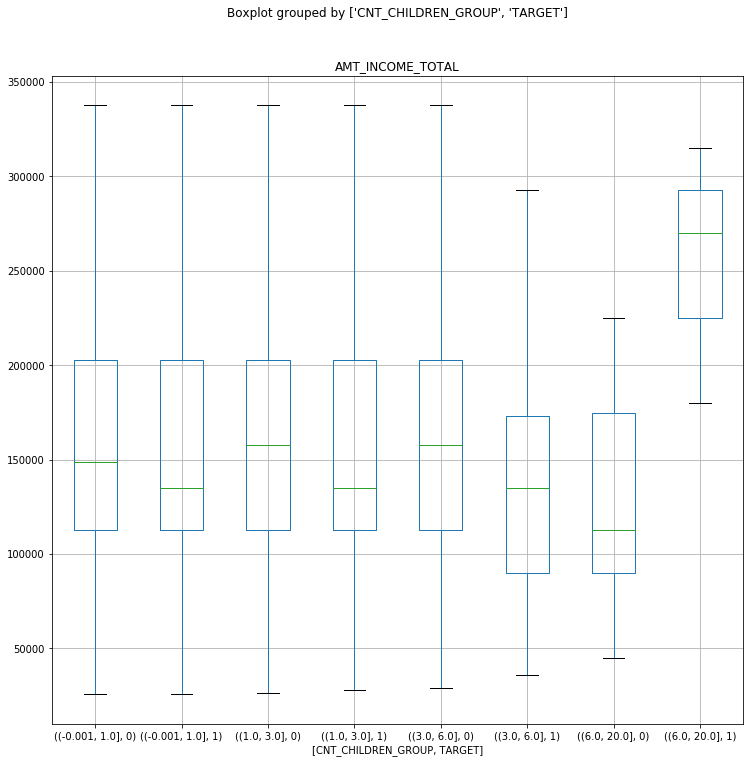

In [6]:
#2-2
"""
Your code here
"""

# 先篩選數值型的欄位

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']



app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

app_train.groupby(plt_by)[plt_column].describe()
#plt.suptitle('test')
#plt.show()

In [46]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x -x.mean()) / x.std() )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.045954
1,270000.0,0.962147
2,67500.0,-0.958437
3,135000.0,-0.318243
4,121500.0,-0.446282
